In [4]:
import numpy as np

# 创建一个多项式 2x^2 + 3x + 1
p = np.poly1d([2, 3, 1])

# 打印多项式
print(p)

# 计算多项式在x=5时的值
print(p(5))

# 多项式的加法
q = np.poly1d([1, 2])  # 多项式 x + 2
r = p + q
print(r)  # 输出新的多项式

# 多项式的乘法
s = p * q
print(s)  # 输出新的多项式

   2
2 x + 3 x + 1
66
   2
2 x + 4 x + 3
   3     2
2 x + 7 x + 7 x + 2


In [17]:
import numpy as np
# 创建两个多项式
p = np.poly1d([2, 3, 1])  # 2x^2 + 3x + 1
q = np.poly1d([1, 2])  # x + 2

# 多项式加法
p_plus_q = p + q
print("p + q =", p_plus_q)
# 多项式减法
p_minus_q = p - q
print("p - q =", p_minus_q)
# 多项式乘法
p_times_q = p * q
print("p * q =", p_times_q)

# 多项式除法
# 除法在多项式运算中比较特殊，因为除法的结果可能包括商和余数
# numpy.poly1d提供了divmod函数，用于同时返回商和余数

q_div_p, remainder = np.polydiv(q, p)
print("q / p =", q_div_p)
print("余数 =", remainder)

# 如果对于除法你只需要商（不考虑余数），可以直接使用div函数，但是poly1d中没有直接的div方法，所以需要手动计算
q_div_p_only_quotient = np.polydiv(q, p)[0]
print("q / p (only quotient) =", q_div_p_only_quotient)

p + q =    2
2 x + 4 x + 3
p - q =    2
2 x + 2 x - 1
p * q =    3     2
2 x + 7 x + 7 x + 2
q / p =  
0
余数 =  
1 x + 2
q / p (only quotient) =  
0


In [2]:
import numpy as np

# 创建一个多项式
p = np.poly1d([2, 3, 1])  # 表示 2x^2 + 3x + 1

# 对多项式进行一阶微分
dp = p.deriv()
print("一阶微分:", dp)

# 对多项式进行二阶微分
ddp = p.deriv(2)
print("二阶微分:", ddp)

一阶微分:  
4 x + 3
二阶微分:  
4


In [4]:
# 对多项式进行一阶积分
ip = p.integ()
print("一阶积分 (积分常数为0):\n", ip)

# 对多项式进行一阶积分，并指定积分常数为1
ip_k1 = p.integ(k=1)
print("一阶积分 (积分常数为1):\n", ip_k1)

# 注意：连续积分时，积分常数会累加
ipp = p.integ(2)  # 这相当于两次应用.integ(k=0)
print("二阶积分 (积分常数为0):\n", ipp)

ipp_k2 = p.integ(2, k=2)  # 这相当于两次应用.integ()，但总积分常数为2
print("二阶积分 (总积分常数为2):\n", ipp_k2)

一阶积分 (积分常数为0):
         3       2
0.6667 x + 1.5 x + 1 x
一阶积分 (积分常数为1):
         3       2
0.6667 x + 1.5 x + 1 x + 1
二阶积分 (积分常数为0):
         4       3       2
0.1667 x + 0.5 x + 0.5 x
二阶积分 (总积分常数为2):
         4       3       2
0.1667 x + 0.5 x + 0.5 x + 2 x + 2


In [5]:
import numpy as np

# 创建一个多项式 2x^2 + 3x + 1
p = np.poly1d([2, 3, 1])
# 获取多项式的系数
coeffs = p.coef
# 使用 numpy.roots() 找到多项式的根
roots = np.roots(coeffs)
print("多项式的根 =", roots)

多项式的根 = [-1.  -0.5]


In [6]:
import numpy as np


def f(x):
    y = x**3 - x - 1  # 求根方程的表达式
    return y


def g(x):
    y = 3 * x**2 - 1  # 求根方程的导函数
    return y


def main():
    x_0 = 1.5  # 取初值
    e = 10 ** (-9)  # 误差要求
    L = 0  # 初始化迭代次数
    while L < 100:  # 采用残差来判断
        x1 = x_0 - f(x_0) / g(x_0)  # 迭代公式,x(n+1)=x(n)-f(x(n))/f'(x(n))
        x_0 = x1
        L = L + 1  # 统计迭代次数
        if abs(f(x_0) - 0) < e:
            break
    print(f"x1={x1}")  # 输出数值解
    print(f(x_0) - 0)  # 验证解的正确性
    print(f"L={L}")  # 输出迭代次数


if __name__ == "__main__":
    main()

x1=1.3247179572447898
1.865174681370263e-13
L=4


拟合得到的多项式:          2
-0.1607 x + 0.5007 x + 0.2214


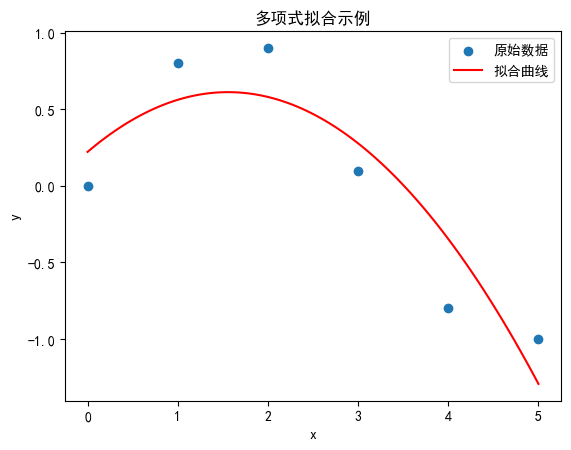

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体（SimHei是黑体，Windows/Linux/Mac都可能支持）
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 指定默认字体
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示为方块的问题

# 示例数据
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 0.8, 0.9, 0.1, -0.8, -1])

# 多项式拟合
deg = 2
coeffs = np.polyfit(x, y, deg)
p = np.poly1d(coeffs)

# 打印拟合多项式
print("拟合得到的多项式:", p)

# 生成拟合曲线
x_fit = np.linspace(min(x), max(x), 100)
y_fit = p(x_fit)

# 绘图
plt.scatter(x, y, label="原始数据")
plt.plot(x_fit, y_fit, color="red", label="拟合曲线")
plt.xlabel("x")
plt.ylabel("y")
plt.title("多项式拟合示例")
plt.legend()
plt.show()